In [27]:
import json
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
listings_json = json.load(open("../data/aggregated.json"))

In [10]:
aggregated = pd.DataFrame(listings_json)
aggregated.head()

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095.0,2,1.0,876,None,None,1.0,1.0,1.0,[],apartment,NaN,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000.0,4,2.5,2000,None,None,1.0,1.0,1.0,[],house,NaN,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695.0,3,2.0,0,None,None,1.0,0.0,1.0,[],apartment,NaN,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385.0,1,1.0,800,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185.0,1,1.0,800,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...


In [11]:
aggregated['area'] = aggregated['area'].apply(get_area)
aggregated['bed'] = aggregated['bed'].apply(get_bed)
aggregated.head()

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095.0,2.0,1.0,876.0,None,None,1.0,1.0,1.0,[],apartment,NaN,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000.0,4.0,2.5,2000.0,None,None,1.0,1.0,1.0,[],house,NaN,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695.0,3.0,2.0,0.0,None,None,1.0,0.0,1.0,[],apartment,NaN,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385.0,1.0,1.0,800.0,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185.0,1.0,1.0,800.0,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...


In [12]:
aggregated[['price', 'bed', 'bath', 'parking', 'pets', 'laundry', 'year_built', 'area']].corr()

,price,bed,bath,parking,pets,laundry,year_built,area
price,1.000000,0.609696,0.340268,-0.081144,-0.195342,-0.066057,-0.038724,0.295215
bed,0.609696,1.000000,0.660943,0.076723,-0.080173,-0.027155,0.110130,0.433381
bath,0.340268,0.660943,1.000000,0.057643,-0.093690,-0.002040,0.153776,0.590749
parking,-0.081144,0.076723,0.057643,1.000000,0.320473,0.203173,0.175739,-0.035837
pets,-0.195342,-0.080173,-0.093690,0.320473,1.000000,0.193587,NaN,-0.163541
laundry,-0.066057,-0.027155,-0.002040,0.203173,0.193587,1.000000,0.404787,-0.179801
year_built,-0.038724,0.110130,0.153776,0.175739,NaN,0.404787,1.000000,0.234603
area,0.295215,0.433381,0.590749,-0.035837,-0.163541,-0.179801,0.234603,1.000000


In [13]:
graph = aggregated.groupby('property_type').mean()
graph.plot.bar(y = ['bed'], legend = False)

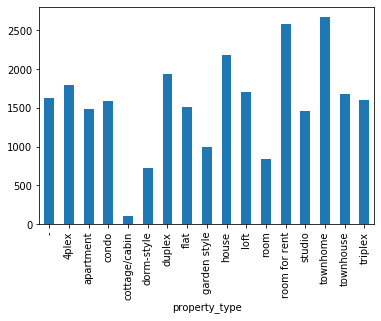

In [14]:
graph2 = aggregated.groupby('property_type').mean()
graph2.plot.bar(y = ['price'], legend = False)

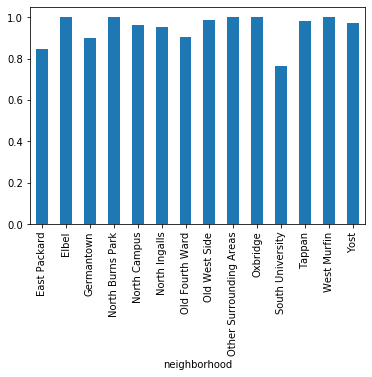

In [15]:
graph3 = aggregated.groupby('neighborhood').mean()
graph3.plot.bar(y = ['parking'], legend = False)

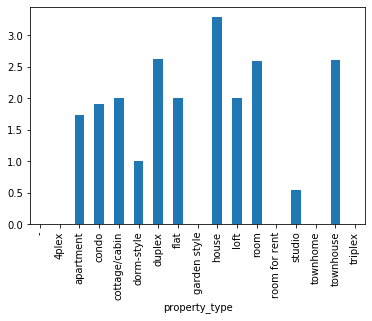

In [16]:
graph = aggregated.groupby('property_type').mean()
graph.plot.bar(y = ['bed'], legend = False)

In [17]:
def get_area(area):
    if area == None or isinstance(area, str):
        return np.nan
    else:
        return area

In [18]:
def get_bed(bed):
    if bed == None or isinstance(bed, str):
        return np.nan
    else:
        return bed

In [19]:
def remove_nonfloat(cat):
    if cat == None or isinstance(cat, str) or np.isnan(cat):
        return 0
    else:
        return cat

In [20]:
df = pd.DataFrame(listings_json)
df['area'] = df['area'].apply(remove_nonfloat)
df['bed'] = df['bed'].apply(remove_nonfloat)
df['bath'] = df['bath'].apply(remove_nonfloat)
df['price'] = df['price'].apply(remove_nonfloat)
df['laundry'] = df['laundry'].apply(remove_nonfloat)
df['pets'] = df['pets'].apply(remove_nonfloat)
df['parking'] = df['parking'].apply(remove_nonfloat)
aggregated.head()

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095.0,2.0,1.0,876.0,None,None,1.0,1.0,1.0,[],apartment,NaN,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000.0,4.0,2.5,2000.0,None,None,1.0,1.0,1.0,[],house,NaN,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695.0,3.0,2.0,0.0,None,None,1.0,0.0,1.0,[],apartment,NaN,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385.0,1.0,1.0,800.0,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185.0,1.0,1.0,800.0,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...


In [21]:
from sklearn.preprocessing import StandardScaler
features = ['price', 'bed', 'bath', 'area', 'laundry', 'pets', 'parking']
x = df.loc[:, features].values
y = df.loc[:,['neighborhood']].values
x = StandardScaler().fit_transform(x)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['neighborhood']]], axis = 1)

Text(0.5, 1.0, '2 component PCA')

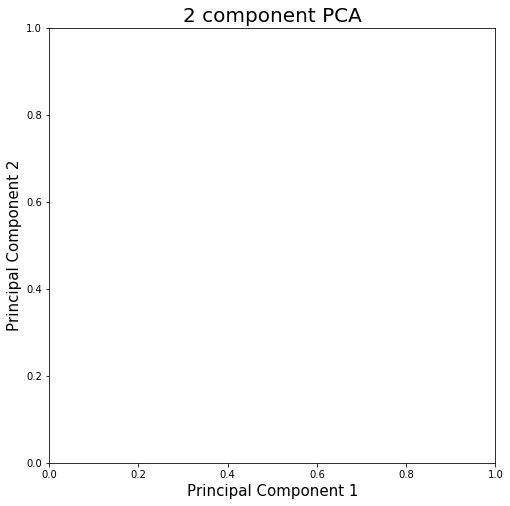

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

In [33]:
targets = ['North Campus', 'East Packard', 'Oxbridge']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['neighborhood'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()